In [5]:
import os
import shutil # 명령 프롬프트를 사용 가능하게 해주는 것
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import layers, models, optimizers
from keras.datasets import mnist
from keras.utils import to_categorical, load_img
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator 
from keras_preprocessing.image import load_img, array_to_img

warnings.filterwarnings('ignore')

In [6]:
# Original Data Path
original_dataset_dir = './datasets/train/'

# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

# 만약 base_dir이 존재 할 경우, rmtree = 지워버림
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

# 그 후 만듬    
os.mkdir(base_dir)    

In [7]:
# Train, Validation, Test data
# 데이터를 위해 분류 파일을 만듬
# 디렉토리 : dataset > test, train, validation
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)


In [8]:
# Train, Test, Validation 파일에 개 고양이 분류를 위해 
# cats, dogs 파일을 각각 만듬
# 디렉토리: dataset > test, train, validation > cats, dogs
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)


In [9]:
# File Copy
# 개와 고양이 파일 가르기!

# 분류를 위해 사진 이름(###~###)을 가질 리스트
fnames = []

for i in range(1000):
    filename = 'cat.{}.jpg'.format(i)
    fnames.append(filename)

# 위의 for문을 축약하면
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [10]:
# train폴더에서 파일들을 train, test, validation 폴더로 각각 옮기는 작업!!

# cat - train - data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
# dog - train - data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)    

In [11]:
# cat - Validation - data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
# dog - Validation - data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)    

In [12]:
# cat - test - data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
# dog - test - data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)    

In [13]:
# os.listdir은 폴더 내의 파일 명을 다 출력함
# 앞에 len을 붙여서 파일 개수만 출력
print('Train cat images: ',len(os.listdir(train_cats_dir)))
print('Train dog images: ',len(os.listdir(train_dogs_dir)))

print('Validation cat images: ',len(os.listdir(validation_cats_dir)))
print('Validation dog images: ',len(os.listdir(validation_dogs_dir)))

print('Test cat images: ',len(os.listdir(test_cats_dir)))
print('Test dog images: ',len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [14]:
model = models.Sequential()

# 복습! Conv2D는 특징을 잡어가는 것!
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3))) # 사진이 컬러임으로 3! 흑백이였다면 1
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu')) 
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) # 개 또는 고양이, 2진분류 문제임으로 시그모이드! 다중였다면 softmax

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### 위의 과정 요약

1. 파일 디렉토리 설정

    train, validation, test 폴더를 만듬

    그 후, 각각 폴더에 cats, dogs 폴더를 만듬

    그 후, cats, dogs 폴더에 수를 지정해서 이미지 파일을 각각 폴더로 카피
    
    각각 파일 갯수 확인

2. 머신러닝을 한 세팅

    Conv2D -> MaxPool2D 반복 후  그 결과값을 Flatten 으로 긴 1차원 데이터를 만든 후 

    Dense 함수로 결과값 추출, 이 때, 개와 고양이, 즉 2진 분류 문제임으로

    전 프로젝트(글자체 - 다중 분류 - softmax)와 다르게 sigmoid 함수 사용!


### 바로 다음에 해야할 일!
현재 데이터는 일반 사진파일임, 이 파일들을 학습 시키기 위해 tensor로 변형시켜야함! - 데이터 전처리(Data Preprocessing)

In [18]:
# 이미지 사이즈 및 크기, 픽셀또한 제 각각임으로, 이미지 스케일을 맞춰줘야함!
# Image Scaling

# 스케일을 제조정 - 1/255 비율
train_datagen = ImageDataGenerator(rescale=1./255) 
validation_datagen = ImageDataGenerator(rescale=1./255)

# 디렉토리 자료를 읽어들어서 사이즈를 제조정

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150), batch_size=20, class_mode='binary') # 150,150 실제 크기 - 위에 보면 input_size와 같은걸 볼 수 있음!
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=20, class_mode='binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# 입력하기 좋게 바뀐걸 확인!
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [20]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 데이터를 100개씩 나눠서 처리하는것
    epochs=10,
    validation_data= validation_generator,
    validation_steps=50
)
model.save('cats_and_dogs_small_1.0.h5')

Epoch 1/10
100/100 [==============================] - 22s 209ms/step - loss: 0.7065 - accuracy: 0.5165 - val_loss: 0.6885 - val_accuracy: 0.5800
Epoch 2/10
100/100 [==============================] - 21s 205ms/step - loss: 0.6746 - accuracy: 0.6010 - val_loss: 0.6631 - val_accuracy: 0.5960
Epoch 3/10
100/100 [==============================] - 20s 204ms/step - loss: 0.6166 - accuracy: 0.6645 - val_loss: 0.5925 - val_accuracy: 0.6870
Epoch 4/10
100/100 [==============================] - 20s 203ms/step - loss: 0.5706 - accuracy: 0.7055 - val_loss: 0.6067 - val_accuracy: 0.6770
Epoch 5/10
100/100 [==============================] - 21s 209ms/step - loss: 0.5351 - accuracy: 0.7345 - val_loss: 0.7494 - val_accuracy: 0.6330
Epoch 6/10
100/100 [==============================] - 21s 210ms/step - loss: 0.5011 - accuracy: 0.7480 - val_loss: 0.5637 - val_accuracy: 0.7040
Epoch 7/10
100/100 [==============================] - 21s 210ms/step - loss: 0.4572 - accuracy: 0.7825 - val_loss: 0.6329 - val_ac

In [21]:
# Tensor(학습용) 데이터로 바뀐걸 확인
# Check the Resized data
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [22]:
#데이터 시각화를 위한 데이터 저장
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1) # 첫번째 반복을 나타내기 위해


<Figure size 640x480 with 0 Axes>

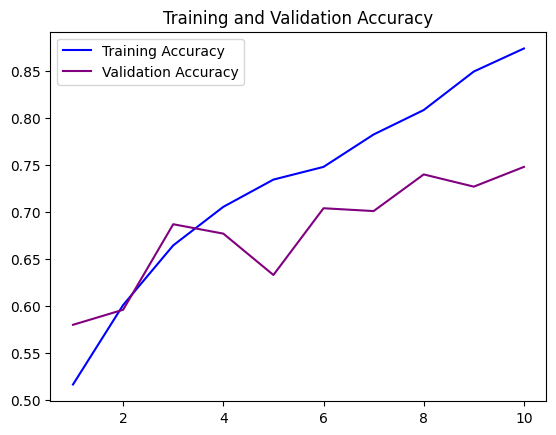

<Figure size 640x480 with 0 Axes>

In [23]:
# Training and Validation Accuracy Graph
plt.plot(epochs,acc,'-',c='blue',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'-',c='purple',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('Training Accuracy.png')
plt.figure()


<Figure size 640x480 with 0 Axes>

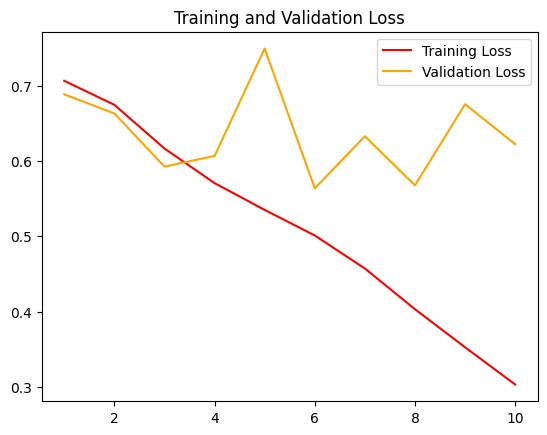

<Figure size 640x480 with 0 Axes>

In [24]:
#Training and Validation Loss Graph
plt.plot(epochs,loss,'-',c='red',label = 'Training Loss')
plt.plot(epochs,val_loss,'-',c='orange',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training loss.png')
plt.figure()


### 학습 결과 및 개선 방안

위의 그래프에서 볼 수 있듯이 Validation의 Accuracy의 값은 하락하고 Loss의 값은 상승하는 것을 볼 수 있음

즉, 같은 데이터로 너무 많은 학습을 통해 오버피팅이 일어남

여기서 할 수 있는 방법은

1. epochs 숫자를 적정선에서 끊키 (그래프 확인상 12회가 적절해 보임)

2. 트레이닝 이미지(데이터)를 아래 방법을 통해 개수를 늘려서 학습 시키기! 

In [25]:

datagen = ImageDataGenerator(
    rotation_range=40,       # 이미지 회전
    width_shift_range=0.2,   # 좌로 이동
    height_shift_range=0.2,  # 상하 이동
    shear_range=0.2,         # 이미지 각도 조정
    zoom_range=0.2,          # 이미지 확대 및 축소
    horizontal_flip=True,    # 상하 반전
    vertical_flip=True,      # 좌우 반전
    fill_mode='nearest'      # 사진 속 공백을 뭐로 채울 것인지 (현재는 가장 가까이 있는 색으로 채움)
)


In [26]:
fnames = sorted([os.path.join(train_cats_dir,fname)  for fname in os.listdir(train_cats_dir)])
fnames 

['./datasets/cats_and_dogs_small\\train\\cats\\cat.0.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.1.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.10.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.100.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.101.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.102.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.103.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.104.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.105.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.106.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.107.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.108.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.109.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.11.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.110.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.111.jpg',
 './datasets/cats_and_dogs_sma

In [27]:
img_path = fnames[5]
img = load_img(img_path, target_size=(300,300))

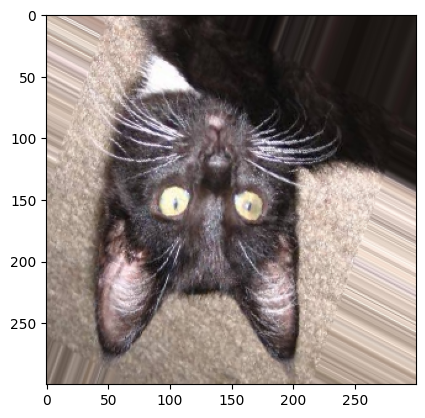

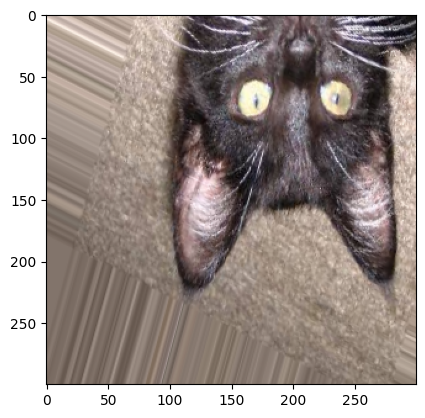

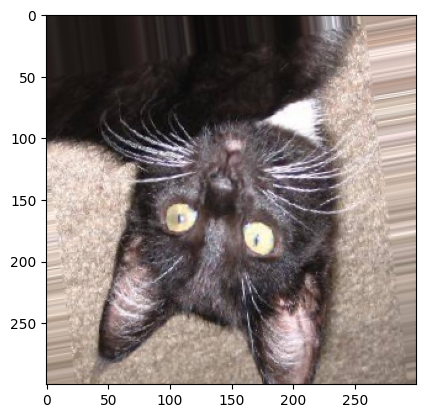

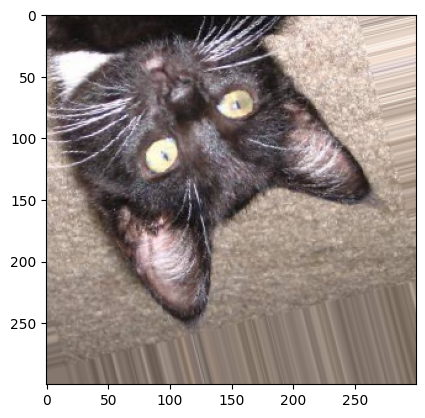

In [28]:
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i=0

# 한개당 한번씩만 처리
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i% 4 ==0:
        break
plt.show()

In [30]:

train_datagen = ImageDataGenerator(    
                                   rescale=1./255,    
                                   rotation_range=40,    
                                   width_shift_range=0.2,    
                                   height_shift_range=0.2,    
                                   shear_range=0.2,    
                                   zoom_range=0.2,    
                                   horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리        
    train_dir,        
    # 모든 이미지를 150 × 150 크기로 바꿉니다        
    target_size=(150, 150),        
    batch_size=32,        
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(        
                                                        validation_dir,        
                                                        target_size=(150, 150),        
                                                        batch_size=32,        
                                                        class_mode='binary')

history = model.fit_generator(      
                              train_generator,      
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
 29/100 [=======>......................] - ETA: 21s - loss: 0.5978 - accuracy: 0.6746

KeyboardInterrupt: 